In [1]:
import pandas as pd
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np
import matplotlib.pyplot as plt

In [2]:
url = 'https://raw.githubusercontent.com/shruti101/Segmented-Marketing-using-KNN-clustering/main/cluster_data'

In [3]:
df = pd.read_csv(url, sep=',')

In [4]:
df = df.drop('Unnamed: 0', axis=1)
df

,Cluster,customer_number,fruit_veg,dairy,confectionary,grocery_food,grocery_health_pets,bakery,newspapers_magazines,prepared_meals,...,world_foods,lottery,cashpoint,seasonal_gifting,discount_bakery,practical_items,total_quantity,average_quantity,total_spend,average_spend
0,5,11387,64.58,35.91,107.78,27.08,29.59,1.0,54.83,6.35,...,28.54,2.0,15.0,7.48,1.0,0.84,545,1.109980,697.76,1.42
1,1,8171,16.89,37.24,28.84,33.43,66.40,1.0,22.06,12.09,...,3.76,1.0,1.0,9.99,1.0,1.00,330,1.235955,369.31,1.38
2,0,1060,87.30,82.98,49.88,20.57,37.04,18.0,9.85,57.98,...,1.00,18.0,20.0,106.46,1.0,1.00,432,1.125000,668.68,1.74
3,2,3728,84.05,186.56,175.50,119.84,111.08,1.0,13.05,25.54,...,1.00,4.0,1.0,1.00,1.0,4.50,1010,1.393103,1104.10,1.52
4,1,14621,35.16,121.31,79.23,29.03,37.17,1.0,40.06,1.00,...,1.00,1.0,1.0,3.40,1.0,1.00,760,1.124260,524.45,0.78
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,1,12541,64.52,73.84,89.36,135.31,61.99,1.0,1.00,61.02,...,3.36,1.0,1.0,1.00,1.0,2.53,851,1.113874,800.43,1.05
2996,4,16081,5.91,18.08,18.32,23.69,16.12,1.0,5.39,15.96,...,9.74,30.0,1.0,1.00,1.0,1.61,209,1.082902,222.26,1.15
2997,1,7094,116.54,106.08,42.31,35.92,43.59,1.0,13.68,1.78,...,2.59,1.0,1.0,1.00,1.0,6.79,354,1.085890,448.42,1.38
2998,6,3457,3.68,13.44,21.96,10.10,12.51,1.0,4.75,1.04,...,1.65,1.0,1.0,1.98,1.0,1.00,157,1.068027,115.90,0.79


In [5]:
x = df.drop(['Cluster'] , axis =1)
y = df.Cluster

In [6]:
from sklearn.model_selection import train_test_split

In [7]:
x_train, x_test, y_train, y_test = train_test_split(df.drop(['Cluster','average_spend'],axis=1), df['average_spend'], test_size= 0.3)

In [8]:
for num in range(5,20):
    dtr = DecisionTreeRegressor(max_features= 'log2',
     max_leaf_nodes= num,
     min_samples_leaf= 10,
     min_samples_split= 5,
     splitter='best'
       )
    dtr.fit(x_train,y_train)
    pred = dtr.predict(x_test)
    print('For max_leaf_nodes = %s' % num)
    print('Mean Squared Error',mean_squared_error(pred,y_test))
    print('Mean Absolute Error',mean_absolute_error(pred,y_test))
    print('Root Mean Squared Error',mean_squared_error(pred,y_test)**0.5)
    print('Clusters = ',np.unique(pred))
    print()

For max_leaf_nodes = 5
Mean Squared Error 0.3068733062367279
Mean Absolute Error 0.3794485908732159
Root Mean Squared Error 0.5539614663825706
Clusters =  [1.48353364 2.08049645 2.10022792 3.4275     3.65619048]

For max_leaf_nodes = 6
Mean Squared Error 0.3882521095550472
Mean Absolute Error 0.42375689736156863
Root Mean Squared Error 0.6230987959826654
Clusters =  [1.52373176 1.80648148 2.195      2.24883117 2.54666667]

For max_leaf_nodes = 7
Mean Squared Error 0.33766251314980095
Mean Absolute Error 0.3970567763501337
Root Mean Squared Error 0.5810873541472065
Clusters =  [1.51501546 1.60179856 1.91890688 1.99515385 2.27743902 3.54
 3.54821429]

For max_leaf_nodes = 8
Mean Squared Error 0.3418830669784463
Mean Absolute Error 0.39521494510741023
Root Mean Squared Error 0.5847076765174597
Clusters =  [1.46879493 1.79763713 2.09855967 2.11216867 2.77790123 3.58642857
 3.67230769 5.206     ]

For max_leaf_nodes = 9
Mean Squared Error 0.31663936732959225
Mean Absolute Error 0.3843036995

In [9]:
num = 11
dtr = DecisionTreeRegressor(max_features= 'log2',
     max_leaf_nodes= num,
     min_samples_leaf= 10,
     min_samples_split= 5,
     splitter='best')
dtr.fit(x_train,y_train)

DecisionTreeRegressor(max_features='log2', max_leaf_nodes=11,
                      min_samples_leaf=10, min_samples_split=5)

In [10]:
print(dtr.predict(x_train))

[1.77612403 1.55971722 1.55971722 ... 1.55971722 1.55971722 1.55971722]


In [11]:
feats = x_train.columns

In [12]:
text_representation = tree.export_text(dtr)
print(text_representation)

|--- feature_17 <= 566.63
|   |--- feature_1 <= 22.72
|   |   |--- feature_3 <= 7.31
|   |   |   |--- feature_12 <= 45.89
|   |   |   |   |--- value: [2.08]
|   |   |   |--- feature_12 >  45.89
|   |   |   |   |--- value: [3.52]
|   |   |--- feature_3 >  7.31
|   |   |   |--- feature_22 <= 1.62
|   |   |   |   |--- feature_12 <= 216.14
|   |   |   |   |   |--- feature_13 <= 122.65
|   |   |   |   |   |   |--- feature_17 <= 7.00
|   |   |   |   |   |   |   |--- value: [1.43]
|   |   |   |   |   |   |--- feature_17 >  7.00
|   |   |   |   |   |   |   |--- value: [1.78]
|   |   |   |   |   |--- feature_13 >  122.65
|   |   |   |   |   |   |--- value: [2.21]
|   |   |   |   |--- feature_12 >  216.14
|   |   |   |   |   |--- feature_2 <= 17.57
|   |   |   |   |   |   |--- value: [3.92]
|   |   |   |   |   |--- feature_2 >  17.57
|   |   |   |   |   |   |--- value: [2.36]
|   |   |   |--- feature_22 >  1.62
|   |   |   |   |--- value: [3.90]
|   |--- feature_1 >  22.72
|   |   |--- value: [1

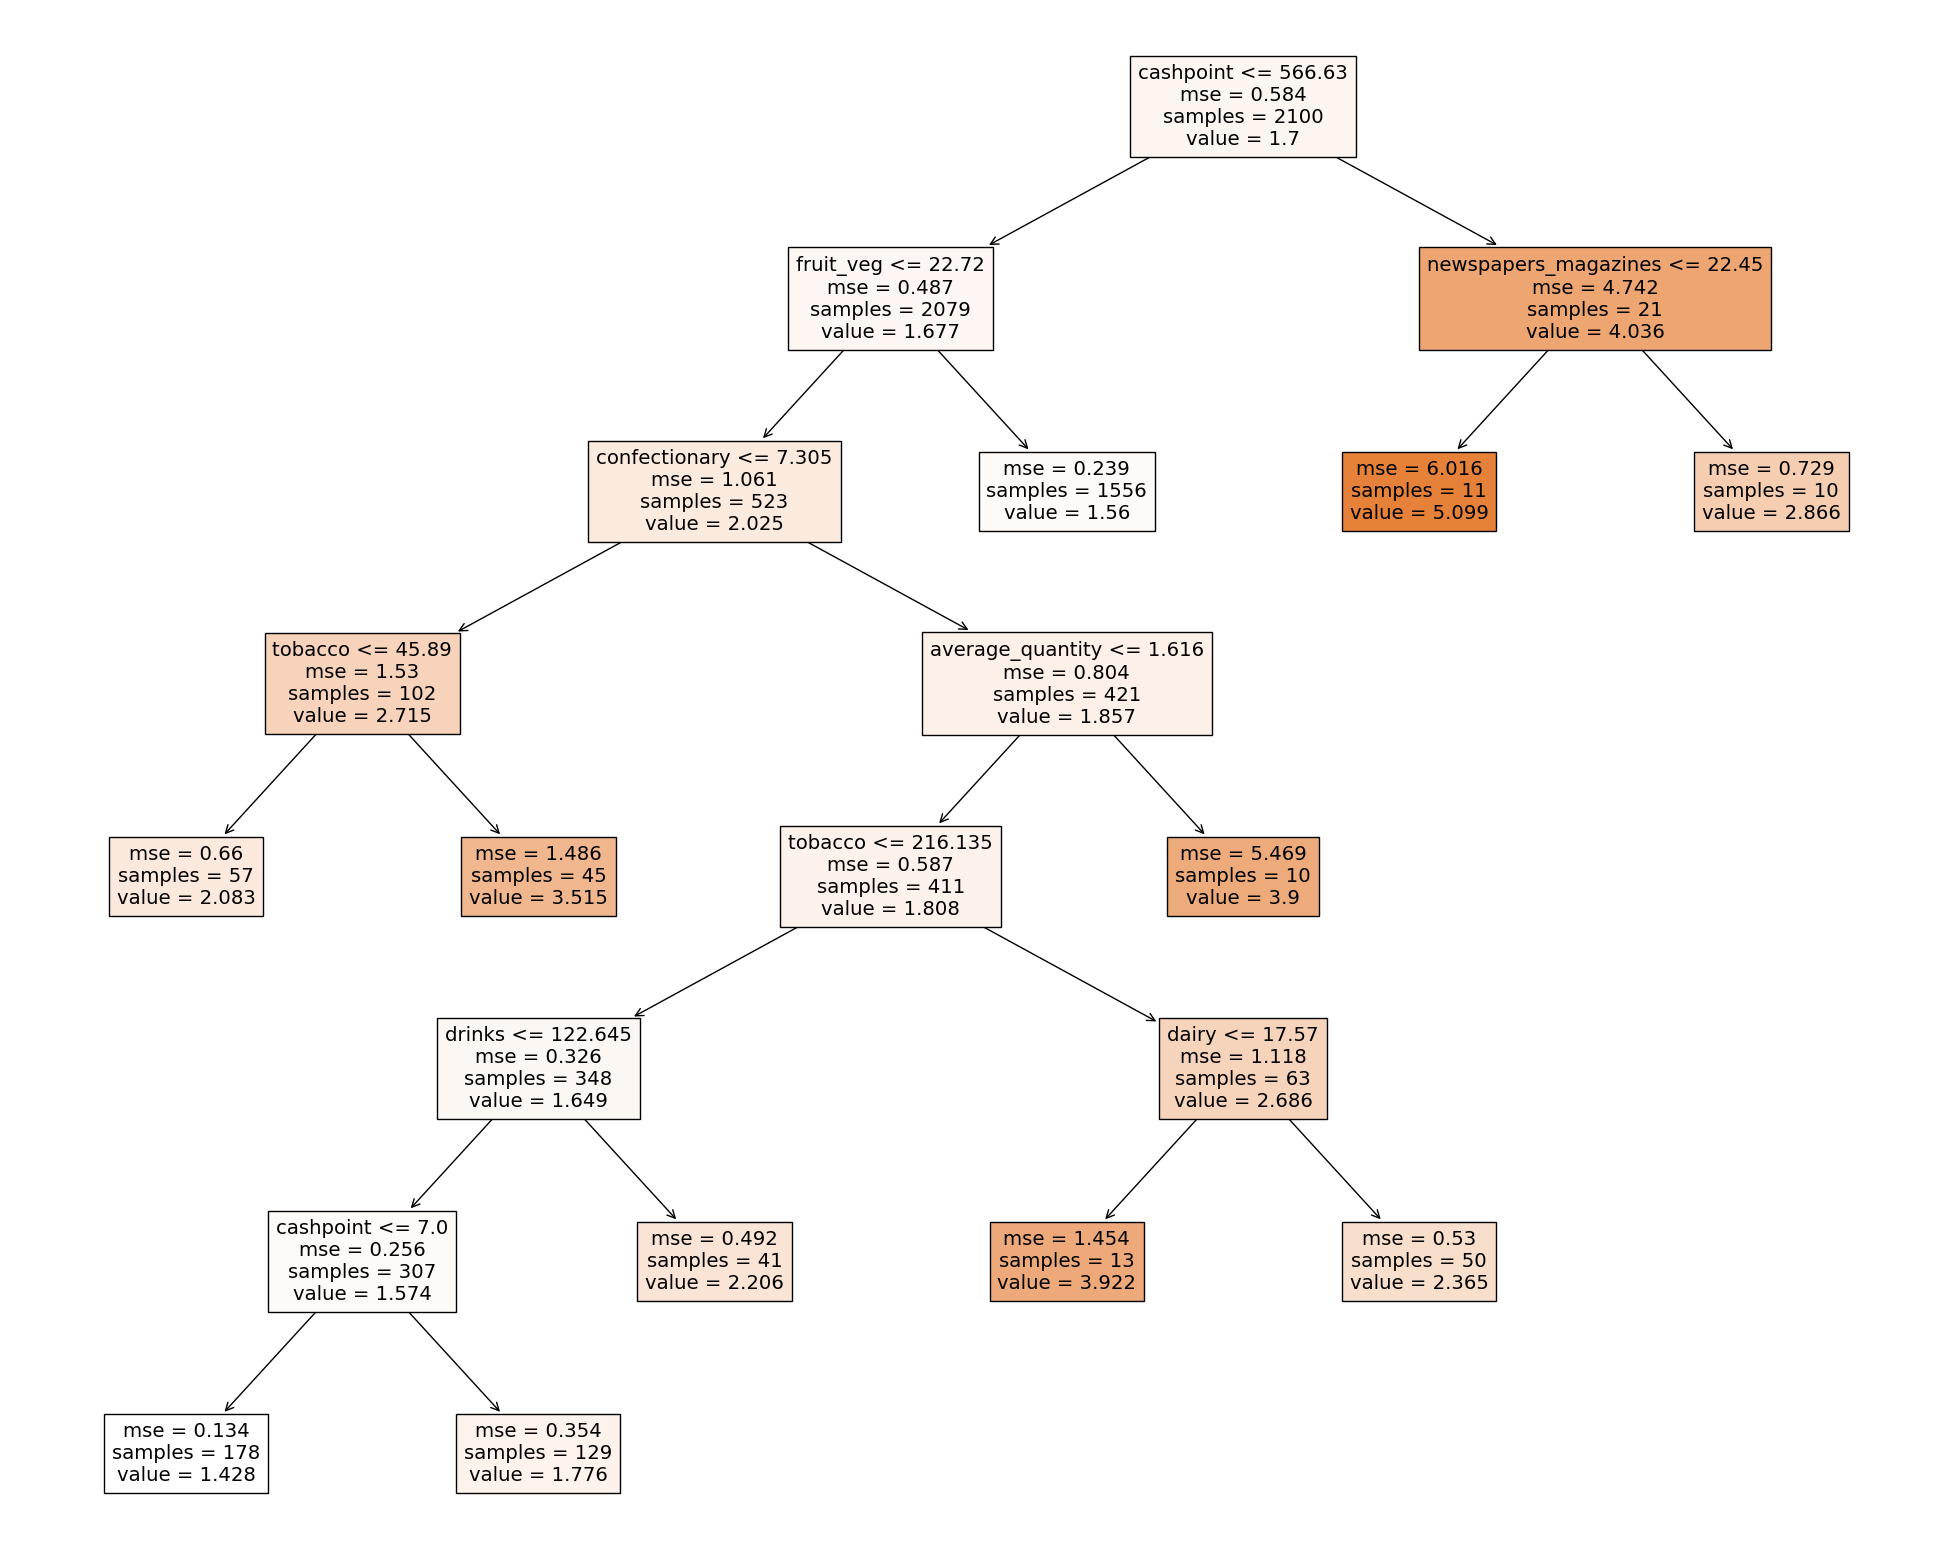

In [13]:
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(dtr, 
                   feature_names=feats,  
                   
                   filled=True)

In [14]:
# from sklearn.tree import _tree

# def tree_to_code(tree, feature_names):
#     tree_ = tree.tree_
#     feature_name = [
#         feature_names[i] if i != _tree.TREE_UNDEFINED else "undefined!"
#         for i in tree_.feature
#     ]
#     feature_names = [f.replace(" ", "_")[:-5] for f in feature_names]
#     print("def predict({}):".format(", ".join(feature_names)))

#     def recurse(node, depth):
#         indent = "    " * depth
#         if tree_.feature[node] != _tree.TREE_UNDEFINED:
#             name = feature_name[node]
#             threshold = tree_.threshold[node]
#             print("{}if {} <= {}:".format(indent, name, np.round(threshold,2)))
#             recurse(tree_.children_left[node], depth + 1)
#             print("{}else:  # if {} > {}".format(indent, name, np.round(threshold,2)))
#             recurse(tree_.children_right[node], depth + 1)
#         else:
#             print("{}return {}".format(indent, tree_.value[node]))

#     recurse(0, 1)

In [16]:
from sklearn.tree import _tree

In [17]:
def get_rules(tree, feature_names, class_names):
    tree_ = tree.tree_
    feature_name = [
        feature_names[i] if i != _tree.TREE_UNDEFINED else "undefined!"
        for i in tree_.feature
    ]

    paths = []
    path = []
    
    def recurse(node, path, paths):
        
        if tree_.feature[node] != _tree.TREE_UNDEFINED:
            name = feature_name[node]
            threshold = tree_.threshold[node]
            p1, p2 = list(path), list(path)
            p1 += [f"({name} <= {np.round(threshold, 3)})"]
            recurse(tree_.children_left[node], p1, paths)
            p2 += [f"({name} > {np.round(threshold, 3)})"]
            recurse(tree_.children_right[node], p2, paths)
        else:
            path += [(tree_.value[node], tree_.n_node_samples[node])]
            paths += [path]
            
    recurse(0, path, paths)

    # sort by samples count
    samples_count = [p[-1][1] for p in paths]
    ii = list(np.argsort(samples_count))
    paths = [paths[i] for i in reversed(ii)]
    
    rules = []
    for path in paths:
        rule = "if "
        
        for p in path[:-1]:
            if rule != "if ":
                rule += " and "
            rule += str(p)
        rule += " then "
        if class_names is None:
            rule += "response: "+str(np.round(path[-1][0][0][0],3))
        else:
            classes = path[-1][0][0]
            l = np.argmax(classes)
            rule += f"class: {class_names[l]} (proba: {np.round(100.0*classes[l]/np.sum(classes),2)}%)"
        rule += f" | based on {path[-1][1]:,} samples"
        rules += [rule]
        
    return rules

In [ ]:
# rules = get_rules(dtr, feats, None)
# for r in rules:
#     print(r)


In [ ]:
def get_rules(tree, feature_names, class_names):
    tree_ = tree.tree_
    feature_name = [
        feature_names[i] if i != _tree.TREE_UNDEFINED else "undefined!"
        for i in tree_.feature
    ]

    paths = []
    path = []
    
    def recurse(node, path, paths):
        
        if tree_.feature[node] != _tree.TREE_UNDEFINED:
            name = feature_name[node]
            threshold = tree_.threshold[node]
            p1, p2 = list(path), list(path)
            p1 += [f"({name} <= {np.round(threshold, 3)})"]
            recurse(tree_.children_left[node], p1, paths)
            p2 += [f"({name} > {np.round(threshold, 3)})"]
            recurse(tree_.children_right[node], p2, paths)
        else:
            path += [(tree_.value[node], tree_.n_node_samples[node])]
            paths += [path]
            
    recurse(0, path, paths)

    # sort by samples count
    samples_count = [p[-1][1] for p in paths]
    ii = list(np.argsort(samples_count))
    paths = [paths[i] for i in reversed(ii)]
    
    rules = []
    for path in paths:
        rule = ""
        for p in path[:-1]:
            if rule != "":
                rule += " & "
            rule += str(p.strip('()'))
        rules += [rule]
        
    return rules

In [ ]:
clustering_df = x_train.copy()
clustering_df['LabelOfCluster'] = -1

In [ ]:
%%timeit
rules = get_rules(dtr, feats, None)
i=0
final_df = pd.DataFrame()
for r in rules:
    temp_df = clustering_df.query(r)
    temp_df['LabelOfCluster'].replace(-1, i, inplace=True)
    final_df = final_df.append(temp_df)
    i=i+1

In [ ]:
final_df['LabelOfCluster'].value_counts()